<a href="https://colab.research.google.com/github/viti990/PyTorchCourse/blob/main/Intro_To_PyTorch_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch 2 Quick Intro

* PyTorch 2.0 release -  https://pytorch.org/blog/pytorch-2.0-release/

In [1]:
import torch
print(torch.__version__)

2.3.0+cu121


In [2]:
!nvidia-smi

Fri Jun 14 13:50:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Quick Code Examples

In [3]:
import torch
import torchvision

model= torchvision.models.resnet50()

# After Pytorch 2.0

Note: some PyTorch 2.0 features may hinder the deployment of models https://pytorch.org/get-started/pytorch-2.0/#inference-and-export

In [4]:
import torch
import torchvision

model = torchvision.models.resnet50() # note: this could work with any model
compiled_model = torch.compile(model)

### Training code

### Testing code

## 0. Getting Setup

In [5]:
import torch

# Check PyTorch version
pt_version = torch.__version__
print(f"[INFO] Current PyTorch version: {pt_version} (should be 2.x+)")

#install PyTorch 2.0 if necessary
if pt_version.split(".")[0] == "1": # Check if PyTorch version begins with 1
  !pip install -U torch torchvision torchaudio --index-irl https://dowload.pytorch.org/whl/cu118
  print("[INFO] PyTorch 2.x installedm if you're on Google Collab, you may need to restart your runtime.\
  though as of April 2023, Google Collab comes with PyTorch 2.0 pre-installed.")
  import torch
  pt_version = torch.__version__
  print(f"[INFO] Current PyTorch version: {pt_version} (should be 2.x+)")
else:
  print(f"[INFO] PyTorch 2.x installed, you'll be able to use the new features.")

[INFO] Current PyTorch version: 2.3.0+cu121 (should be 2.x+)
[INFO] PyTorch 2.x installed, you'll be able to use the new features.


## 1. Get GPU info

Why get GPU info?

Because PyTorch 2.0 features (torch.compile()) works best on newer NVIDIA GPUs.

Well, what's a newer NVIDIA GPU?

To find our if your GPU is compatible, see NVIDIA GPU compatibility score list - https://developer.nvidia.com/cuda-gpus

<table>
  <colgroup>
    <col span="2" style="background-color: #D6EEEE">
  </colgroup>
  <tr>
    <th>NVIDIA GPU</th>
    <th>Compute Capability Score</th>
    <th>GPU Type</th>
    <th>Release Year</th>
    <th>Architecture</th>
  </tr>
  <tr>
  <th>RTX 4090</th>
  <th>8.9</th>
  <th>Desktop-class</th>
  <th>2022</th>
  <th>Ada Lovelace</th>
  </tr>
  </tr>
  <tr>
  <th>RTX 4080</th>
  <th>8.9</th>
  <th>Desktop-class</th>
  <th>2022</th>
  <th>Ada Lovelace</th>
  </tr>
  </tr>
  <tr>
  <th>RTX 4070 Ti</th>
  <th>8.9</th>
  <th>Desktop-class</th>
  <th>2022</th>
  <th>Ada Lovelace</th>
  </tr>
  </tr>
  <tr>
  <th>RTX 3090</th>
  <th>8.6</th>
  <th>Desktop-class</th>
  <th>2020</th>
  <th>Ampere</th>
  </tr>
  </tr>
  <tr>
  <th>RTX 3080</th>
  <th>8.6</th>
  <th>Desktop-class</th>
  <th>2020</th>
  <th>Ampere</th>
  </tr>
  <tr>
  <th>RTX 3070</th>
  <th>8.6</th>
  <th>Desktop-class</th>
  <th>2020</th>
  <th>Ampere</th>
  </tr>
  <tr>
  <th>RTX 3060 Ti</th>
  <th>8.6</th>
  <th>Desktop-class</th>
  <th>2020</th>
  <th>Ampere</th>
  </tr>
  <tr>
  <th>H100</th>
  <th>9.0</th>
  <th>Datacenter-class</th>
  <th>2022</th>
  <th>Hopper</th>
  </tr>
  <tr>
  <th>A100</th>
  <th>8.0</th>
  <th>Datacenter-class</th>
  <th>2020</th>
  <th>Ampere</th>
  </tr>
  <tr>
  <th>A10</th>
  <th>8.6</th>
  <th>Datacenter-class</th>
  <th>2021</th>
  <th>Ampere</th>
  </tr>
  </table>

If your GPU has a score of 8.0+, it can leverage *most* if not *all* of the new PyTorch 2.0 features.

GPUs under 8.0 can still leverage PyTorch 2.0, however, the improvements may not be as noticiable as those with 8.0+

**Note:** If you're wondering what GPU you should use for deep learning, check out Tim Dettmers blog post "Which GPU for deep learning?" - https://timdettmers.com/2023/01/30/which-gpu-for-deep-learning/

In [6]:
# Make sure we're using a NVIDIA GPU
if torch.cuda.is_available():
  gpu_info = !nvidia-smi
  gpu_info = '\n'.join(gpu_info)
  if gpu_info.find("failed") >= 0:
    print("Not connected to a GPU, to leverage the best of PyTorch 2.0, you should connect to a GPU.")

  # Get GPU name
  gpu_name = !nvidia-smi --query-gpu=gpu_name --format=csv
  gpu_name = gpu_name[1]
  GPU_NAME = gpu_name.replace(" ", "_") # remove underscores for easier saving
  print(f'GPU name: {GPU_NAME}')

  # Get GPU capability score
  GPU_SCORE = torch.cuda.get_device_capability()
  print(f"GPU capability score: {GPU_SCORE}")
  if GPU_SCORE >= (8, 0):
    print(f"GPU score higher than or equal to (8, 0), PyTorch 2.x speedup features available.")
  else:
    print(f"GPU score lower than (8, 0), PyTorch 2.x speedup features will be limited (PyTorch 2.x speedups happen most on newer GPUs).")

  # Print GPU info
  print(f"GPU information:\n{gpu_info}")

else:
  print("PyTorch couldn't find a GPU, to leverage the best of PyTorch 2.0, you should connect to a GPU.")

GPU name: Tesla_T4
GPU capability score: (7, 5)
GPU score lower than (8, 0), PyTorch 2.x speedup features will be limited (PyTorch 2.x speedups happen most on newer GPUs).
GPU information:
Fri Jun 14 13:50:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      3MiB / 153

### 1.1 Globally set devices

Previously, we've set the device of our tensor/models using `.to(device)`.

* `tensor.to(device)`
* `model.to(device)`


In [7]:
import torch

# Set the device

device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the device with context manager (requires PyTorch 2.x+)
with torch.device(device):
  # All tensors or PyTorch objects created in the context manager will be on the taret device withour using .to()
  layer = torch.nn.Linear(20,30)
  print(f"layer weights are on device: {layer.weight.device}")
  print(f"Layer creating data on device: {layer(torch.randn(128,20)).device}")

layer weights are on device: cuda:0
Layer creating data on device: cuda:0


In [8]:
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the device globally
torch.set_default_device(device)

# all tensors or PyTorch objects created from here on out will be on the target device
layer = torch.nn.Linear(20,30)
print(f"layer weights are on device: {layer.weight.device}")
print(f"Layer creating data on device: {layer(torch.randn(128,20)).device}")

layer weights are on device: cuda:0
Layer creating data on device: cuda:0


## 2. Setting up the experiments

Time to test speed!

To keep things simple we'll run 4 experiments:


<table>
  <colgroup>
    <col span="2" style="background-color: #D6EEEE">
  </colgroup>
  <tr>
    <th>Experiment</th>
    <th>Model</th>
    <th>Data</th>
    <th>Epochs</th>
    <th>Batch Size</th>
    <th>Image size</th>
    <th>torch.compile()</th>
  </tr>
  <tr>
    <th>1 (single run)</th>
    <th>ResNet50</th>
    <th>CIFAR10</th>
    <th>5</th>
    <th>128</th>
    <th>224</th>
    <th>No</th>
  </tr>
  <tr>
    <th>2 (single run)</th>
    <th>ResNet50</th>
    <th>CIFAR10</th>
    <th>5</th>
    <th>128</th>
    <th>224</th>
    <th>Yes</th>
  </tr>
  <tr>
    <th>3 (Multi run)</th>
    <th>ResNet50</th>
    <th>CIFAR10</th>
    <th>3x5</th>
    <th>128</th>
    <th>224</th>
    <th>No</th>
  </tr>
  <tr>
    <th>4 (Multi run)</th>
    <th>ResNet50</th>
    <th>CIFAR10</th>
    <th>3x5</th>
    <th>128</th>
    <th>224</th>
    <th>Yes</th>
  </tr>
</table>

### 2.1 Resnet50 from pytorch

In [9]:
weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V2
transforms = weights.transforms()
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [10]:
model = torchvision.models.resnet50(weights=weights)
model

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 99.9MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
# Count the number of parameters in the model
total_params = sum(
    params.numel() for params in model.parameters()
    # params.numel() for param in model.parameters() if param.requires_grad == True
)
print(f"Total number of parameters: {total_params}")


Total number of parameters: 25557032


**Note:** PyTorch 2.0 *relative* speedups will be most noticeable when as much of GPU as possible is being used. This means a larger model (more trainable parameters) may take longer to train on the whole but will be relatively faster e.g. a model with 1M parameters may take 10 minutes to train but a model with 25M parameters may take ~20 minutes to train

In [12]:
def create_model(num_classes=10):
  """
  Creates a ResNet50 model with transforms and return them both.
  """

  weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V2
  transforms = weights.transforms()
  model = torchvision.models.resnet50(weights=weights)

  # Adjust the head layer to suit our number of classes
  num_features = model.fc.in_features
  # print(f"Number of features: {num_features}")
  model.fc = torch.nn.Linear(num_features, num_classes)
  return model, transforms

model, transforms = create_model()
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

### 2.2 Speedups are most noticeable when a large portion of the GPU(s) is being used

Since modern GPUs are so *fast* at performing operations, you will often notice the majority of *relative* speedups when as much data as possible is on the GPU.

In practice, you generally want to use as much of the GPU memory as possible.

* Increasing the batch size - we've been using batch size 32 but for GPUs with a larger memory capacity you'll generally want to use as large as possible, e.g. 128, 256, 512, 1024, etc.
* Increasing data size - for example instead of using images that are 32x32, use 22,4x224 or 336x336, also you could use an increased embedding size for your data.
* Increase the model size - for example instead of using a model with 1M parameters, use a model with 10M parameters.
* Decreasing data transfer - since bandwidth costs (transfering data) will slow down a GPU (because it want to compute on data)

As a result of doing the above, your relative speedups should be better.

E.g. overall training time may take longer but not linearly.

Resource for learning how to improve PyTorch model speed - https://sebastianraschka.com/blog/2023/pytorch-faster.html

**Note:** This concept of using as much data on the gpu as possible isn't restricted specificially to PyTorch 2.0, it applies to all version on PyTorch and basically all models that train on GPUs.

### 2.3 Check the memory limits of our GPU

Can do so using `torch.cuda` - https://pytorch.org/docs/stable/cuda.html

In [13]:
# Check available GPU memory and total GPU memory
total_free_gpu_memory = 0
total_free_gpu_memory, total_gpu_memory = torch.cuda.mem_get_info()
print(f"Total free GPU memory: {round(total_free_gpu_memory* 1e-9, 3)} GB")
print(f"Total GPU memory: {round(total_gpu_memory * 1e-9, 3)} GB")

Total free GPU memory: 15.453 GB
Total GPU memory: 15.836 GB


* if the GPU has 16GB+ of free memory, set batch size to 128
* if the GPU has less than 16GB of free memory, set the batch size to 32

In [14]:
# set batch size depending on amount of GPU memory
total_free_gpu_memory = round(total_free_gpu_memory * 1e-9, 3)
if total_free_gpu_memory >= 16:
  BATCH_SIZE = 128
  IMAGE_SIZE = 224
  print(f"GPU memory available is {total_free_gpu_memory} GB, using batch size of {BATCH_SIZE}")
else:
  BATCH_SIZE = 64
  IMAGE_SIZE = 128
  print(f"GPU memory available is {total_free_gpu_memory} GB, using batch size of {BATCH_SIZE}")

GPU memory available is 15.453 GB, using batch size of 64


In [15]:
transforms.crop_size = IMAGE_SIZE
transforms.resize_size = IMAGE_SIZE
print(f"Updated data transforms:\n{transforms}")

Updated data transforms:
ImageClassification(
    crop_size=128
    resize_size=128
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


### 2.4 More potential speedups with TF32

TF32 = TensorFloat32

TensorFloat32 = a datatype that bridges Float32 and Float16

Float32 = a number is represented by 32 bytes (e.g. 010101010110011 = 7)

Float16 = a number is represented by 16 bytes (e.g. 01010101 = 4)

See more on precision in computing: https://en.wikipedia.org/wiki/Precision_(computer_science)

What we want is:

1. fast model training
2. Accurate model training

TensorFloat32 = a datatype from NVIDIA which combines float32 and float16

TF32 is available on Ampere GPUs+


In [16]:
GPU_SCORE

(7, 5)

In [17]:
if GPU_SCORE >= (8, 0): # check if GPU is compatible with TF32
  print(f"[INFO] Using GPU with score: {GPU_SCORE}, enabling TF32")
  torch.backends.cuda.matmul.allow_tf32 = True
else:
  print(f"[INFO] Using GPU with score: {GPU_SCORE}, TensorFloat32 not available")
  torch.backends.cuda.matmul.allow_tf32 = False

[INFO] Using GPU with score: (7, 5), TensorFloat32 not available


## 2.5 Preparing datasets

As before, we discussed we're going to use CIFAR10.

Home page: https://www.cs.toronto.edu/~kriz/cifar.html

We can download the dataset from torchvision: https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html

In [18]:
transforms

ImageClassification(
    crop_size=128
    resize_size=128
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [19]:
# Create train and test datasets
train_dataset = torchvision.datasets.CIFAR10(root=".", # where to store data
                                            train=True, # Do we want training datasets
                                            download=True,
                                            transform=transforms)

test_dataset = torchvision.datasets.CIFAR10(root=".", # where to store data
                                            train=False, # Do we want training datasets
                                            download=True,
                                            transform=transforms)

# Get the length of the datasets
train_len = len(train_dataset)
test_len = len(test_dataset)
print(f"[INFO] Train dataset length: {train_len}")
print(f"[INFO] Test dataset length: {test_len}")

100%|██████████| 170498071/170498071 [00:04<00:00, 40972781.78it/s]


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified
[INFO] Train dataset length: 50000
[INFO] Test dataset length: 10000


In [20]:
train_dataset[0][0].shape

torch.Size([3, 128, 128])

## 2.6 Create DataLoaders

Next:
  * Turn datasets into DataLoaders

In [29]:
from torch.utils.data import DataLoader

# Create DataLoaders
import os
NUM_WORKERS = os.cpu_count() # <- use all available CPU cores (this number can be tweaked through experimentation but generally more workers means faster dataloading from CPU to GPU)

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS,
                              pin_memory=True,
                              generator=torch.Generator(device=device))

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS,
                              pin_memory=True)

# Print details
print(f"Train dataloader length: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Test dataloader length: {len(test_dataloader)} batches of size {BATCH_SIZE}")
print(f"Using number of workers: {NUM_WORKERS} (generally more workers means faster dataloading from CPU to GPU)")

Train dataloader length: 782 batches of size 64
Test dataloader length: 157 batches of size 64
Using number of workers: 2 (generally more workers means faster dataloading from CPU to GPU)


## 2.7 Creating training and test loops

Want to create:

* Training and test loops + a timing step for each, so we know how long our models take to train/test

In [30]:
import time
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(epoch: int,
               model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device,
               disable_progress_bar: bool = False) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  progress_bar = tqdm(
        enumerate(dataloader),
        desc=f"Training Epoch {epoch}",
        total=len(dataloader),
        disable=disable_progress_bar
    )


  for batch, (X, y) in progress_bar:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

      # Update progress bar
      progress_bar.set_postfix(
            {
                "train_loss": train_loss / (batch + 1),
                "train_acc": train_acc / (batch + 1),
            }
        )


  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(epoch: int,
              model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device,
              disable_progress_bar: bool = False) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Loop through data loader data batches
  progress_bar = tqdm(
      enumerate(dataloader),
      desc=f"Testing Epoch {epoch}",
      total=len(dataloader),
      disable=disable_progress_bar
  )

  # Turn on inference context manager
  with torch.no_grad(): # no_grad() required for PyTorch 2.0, I found some errors with `torch.inference_mode()`, please let me know if this is not the case
      # Loop through DataLoader batches
      for batch, (X, y) in progress_bar:
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

          # Update progress bar
          progress_bar.set_postfix(
              {
                  "test_loss": test_loss / (batch + 1),
                  "test_acc": test_acc / (batch + 1),
              }
          )

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          disable_progress_bar: bool = False) -> Dict[str, List]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": [],
      "train_epoch_time": [],
      "test_epoch_time": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs), disable=disable_progress_bar):

      # Perform training step and time it
      train_epoch_start_time = time.time()
      train_loss, train_acc = train_step(epoch=epoch,
                                        model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        device=device,
                                        disable_progress_bar=disable_progress_bar)
      train_epoch_end_time = time.time()
      train_epoch_time = train_epoch_end_time - train_epoch_start_time

      # Perform testing step and time it
      test_epoch_start_time = time.time()
      test_loss, test_acc = test_step(epoch=epoch,
                                      model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn,
                                      device=device,
                                      disable_progress_bar=disable_progress_bar)
      test_epoch_end_time = time.time()
      test_epoch_time = test_epoch_end_time - test_epoch_start_time

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f} | "
          f"train_epoch_time: {train_epoch_time:.4f} | "
          f"test_epoch_time: {test_epoch_time:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)
      results["train_epoch_time"].append(train_epoch_time)
      results["test_epoch_time"].append(test_epoch_time)

  # Return the filled results at the end of the epochs
  return results

## 3. Time models across a single run
Experiment 1: Single run without `torch.compile()` for 5 epochs

### 3.1 Experiment 1 - Single run, no compile

In [31]:
# Set the number of epochs
NUM_EPOCHS = 5
# Set the learning rate as a constant
LEARNING_RATE = 0.003


**Note:** Depending on yout GPU/machine, the following code may take a while to run. E.G. in my experience on an A100, it takes about ~7 minutes.

In [ ]:
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [32]:
# Create a model
torch.multiprocessing.set_start_method('spawn', force=True)
model, _ = create_model()
model.to(device)

# Create loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# train model and track results
single_run_no_compile_results = train(model=model,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=test_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      epochs=NUM_EPOCHS,
                                      device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch 0:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 0:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8588 | train_acc: 0.7024 | test_loss: 0.7415 | test_acc: 0.7509 | train_epoch_time: 191.5199 | test_epoch_time: 22.2333


Training Epoch 1:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 0.5062 | train_acc: 0.8270 | test_loss: 0.5425 | test_acc: 0.8168 | train_epoch_time: 187.1647 | test_epoch_time: 22.3985


Testing Epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 0.3811 | train_acc: 0.8696 | test_loss: 0.4695 | test_acc: 0.8400 | train_epoch_time: 187.8118 | test_epoch_time: 21.2921


Training Epoch 3:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 0.2872 | train_acc: 0.9007 | test_loss: 0.4748 | test_acc: 0.8439 | train_epoch_time: 188.1827 | test_epoch_time: 22.3145


Training Epoch 4:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 0.2379 | train_acc: 0.9174 | test_loss: 0.4422 | test_acc: 0.8568 | train_epoch_time: 187.6319 | test_epoch_time: 21.8568


### 3.2 Experiment 2: Single run, using `torch.compile()`

Same setup as experiment 1 except with the new line `torch.compile()`

In [36]:
# Create model and transforms
mode, _ = create_model()
model.to(device)

# Create a loss funtion and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Compile the model
import time
compile_start_time = time.time()

### New in PyTorch 2.x ###
compile_model = torch.compile(model)
compile_end_time = time.time()
compile_time = compile_end_time - compile_start_time
print(f"[INFO] Model compiled in {compile_time:.4f} seconds")

# train the compiled model
single_run_compile_results = train(model=compile_model,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=test_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      epochs=NUM_EPOCHS,
                                      device=device)

[INFO] Model compiled in 0.0006 seconds


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch 0:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 0:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2284 | train_acc: 0.9219 | test_loss: 0.4177 | test_acc: 0.8631 | train_epoch_time: 374.1254 | test_epoch_time: 49.2607


Training Epoch 1:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 0.1685 | train_acc: 0.9414 | test_loss: 0.4657 | test_acc: 0.8607 | train_epoch_time: 199.8357 | test_epoch_time: 20.6765


Training Epoch 2:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 0.1196 | train_acc: 0.9588 | test_loss: 0.4354 | test_acc: 0.8759 | train_epoch_time: 199.3408 | test_epoch_time: 22.3115


Training Epoch 3:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 0.1059 | train_acc: 0.9631 | test_loss: 0.4859 | test_acc: 0.8617 | train_epoch_time: 201.3468 | test_epoch_time: 22.1581


Training Epoch 4:   0%|          | 0/782 [00:00<?, ?it/s]

Testing Epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 0.0848 | train_acc: 0.9698 | test_loss: 0.4737 | test_acc: 0.8718 | train_epoch_time: 200.1950 | test_epoch_time: 22.5304


### 3.3 Compare the results of experiments 1 and 2

In [37]:
# Turn experiment results into dataframes
import pandas as pd
single_run_no_compile_results_df = pd.DataFrame(single_run_no_compile_results)
single_run_compile_results_df = pd.DataFrame(single_run_compile_results)

In [38]:
single_run_no_compile_results_df

,train_loss,train_acc,test_loss,test_acc,train_epoch_time,test_epoch_time
0,0.858786,0.702386,0.741527,0.750896,191.519921,22.233330
1,0.506225,0.827026,0.542514,0.816779,187.164712,22.398539
2,0.381074,0.869605,0.469451,0.839968,187.811840,21.292082
3,0.287198,0.900675,0.474846,0.843949,188.182720,22.314511
4,0.237872,0.917439,0.442238,0.856787,187.631858,21.856779


In [39]:
single_run_compile_results_df

,train_loss,train_acc,test_loss,test_acc,train_epoch_time,test_epoch_time
0,0.228390,0.921935,0.417666,0.863057,374.125410,49.260738
1,0.168516,0.941436,0.465680,0.860669,199.835655,20.676468
2,0.119620,0.958840,0.435423,0.875896,199.340818,22.311515
3,0.105907,0.963135,0.485900,0.861664,201.346795,22.158141
4,0.084779,0.969769,0.473692,0.871815,200.195040,22.530387


In [40]:
# Create filename to save the results
DATASET_NAME = "CIFAR10"
MODEL_NAME = "ResNet50"

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mean_epoch_times(non_compiled_results: pd.DataFrame,
                          compiled_results: pd.DataFrame,
                          multi_runs: bool=False,
                          num_runs: int=0,
                          save: bool=False,
                          save_path: str="",
                          dataset_name: str=DATASET_NAME,
                          model_name: str=MODEL_NAME,
                          num_epochs: int=NUM_EPOCHS,
                          image_size: int=IMAGE_SIZE,
                          batch_size: int=BATCH_SIZE) -> plt.figure:

    # Get the mean epoch times from the non-compiled models
    mean_train_epoch_time = non_compiled_results.train_epoch_time.mean()
    mean_test_epoch_time = non_compiled_results.test_epoch_time.mean()
    mean_results = [mean_train_epoch_time, mean_test_epoch_time]

    # Get the mean epoch times from the compiled models
    mean_compile_train_epoch_time = compiled_results.train_epoch_time.mean()
    mean_compile_test_epoch_time = compiled_results.test_epoch_time.mean()
    mean_compile_results = [mean_compile_train_epoch_time, mean_compile_test_epoch_time]

    # Calculate the percentage difference between the mean compile and non-compile train epoch times
    train_epoch_time_diff = mean_compile_train_epoch_time - mean_train_epoch_time
    train_epoch_time_diff_percent = (train_epoch_time_diff / mean_train_epoch_time) * 100

    # Calculate the percentage difference between the mean compile and non-compile test epoch times
    test_epoch_time_diff = mean_compile_test_epoch_time - mean_test_epoch_time
    test_epoch_time_diff_percent = (test_epoch_time_diff / mean_test_epoch_time) * 100

    # Print the mean difference percentages
    print(f"Mean train epoch time difference: {round(train_epoch_time_diff_percent, 3)}% (negative means faster)")
    print(f"Mean test epoch time difference: {round(test_epoch_time_diff_percent, 3)}% (negative means faster)")

    # Create a bar plot of the mean train and test epoch time for both compiled and non-compiled models
    plt.figure(figsize=(10, 7))
    width = 0.3
    x_indicies = np.arange(len(mean_results))

    plt.bar(x=x_indicies, height=mean_results, width=width, label="non_compiled_results")
    plt.bar(x=x_indicies + width, height=mean_compile_results, width=width, label="compiled_results")
    plt.xticks(x_indicies + width / 2, ("Train Epoch", "Test Epoch"))
    plt.ylabel("Mean epoch time (seconds, lower is better)")

    # Create the title based on the parameters passed to the function
    if multi_runs:
        plt.suptitle("Multiple run results")
        plt.title(f"GPU: {gpu_name} | Epochs: {num_epochs} ({num_runs} runs) | Data: {dataset_name} | Model: {model_name} | Image size: {image_size} | Batch size: {batch_size}")
    else:
        plt.suptitle("Single run results")
        plt.title(f"GPU: {gpu_name} | Epochs: {num_epochs} | Data: {dataset_name} | Model: {model_name} | Image size: {image_size} | Batch size: {batch_size}")
    plt.legend();

    # Save the figure
    if save:
        assert save_path != "", "Please specify a save path to save the model figure to via the save_path parameter."
        plt.savefig(save_path)
        print(f"[INFO] Plot saved to {save_path}")

[INFO] Save path for single run results: pytorch_2_results/figures/_single_run_Tesla_T4_ResNet50_CIFAR10_128_train_epoch_time.png
Mean train epoch time difference: 24.677% (negative means faster)
Mean test epoch time difference: 24.381% (negative means faster)
[INFO] Plot saved to pytorch_2_results/figures/_single_run_Tesla_T4_ResNet50_CIFAR10_128_train_epoch_time.png


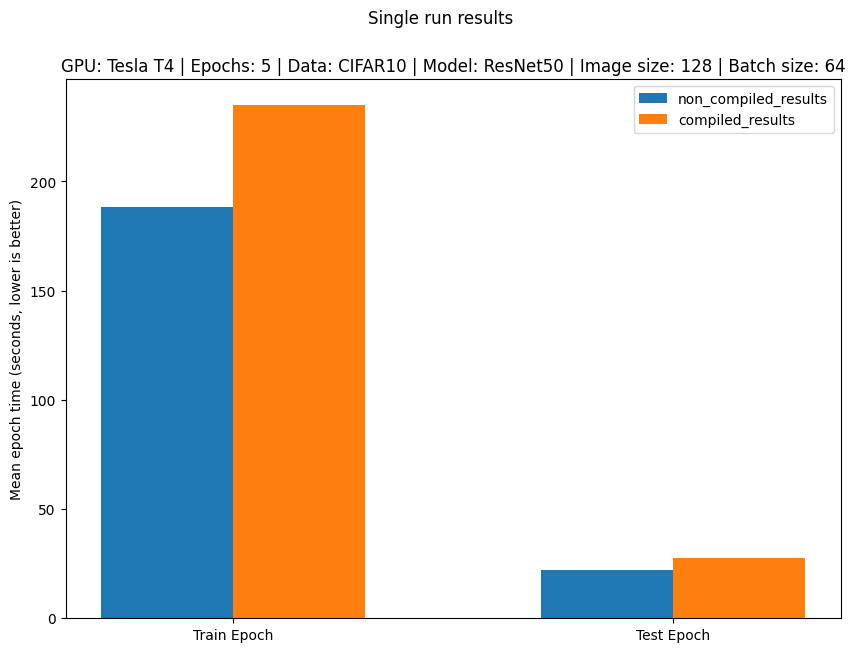

In [42]:
# Create directory for saving figures
import os
dir_to_save_figures_in = "pytorch_2_results/figures/"
os.makedirs(dir_to_save_figures_in, exist_ok=True)

# Create a save path for the single run results
save_path_multi_run = f"{dir_to_save_figures_in}_single_run_{GPU_NAME}_{MODEL_NAME}_{DATASET_NAME}_{IMAGE_SIZE}_train_epoch_time.png"
print(f"[INFO] Save path for single run results: {save_path_multi_run}")

# Plot the results and save the figures
plot_mean_epoch_times(non_compiled_results=single_run_no_compile_results_df,
                      compiled_results=single_run_compile_results_df,
                      multi_runs=False,
                      save_path=save_path_multi_run,
                      save=True)

### 3.4 Save single run results to file with GPU details

In [45]:
# Make a directory for single_run results
import os
pytorch_2_results_dir = "pytorch_2_results"
pytorch_2_single_run_results_dir = f"{pytorch_2_results_dir}/single_run_results"
os.makedirs(pytorch_2_single_run_results_dir, exist_ok=True)

# Create filenames for each of the dataframes
save_name_for_non_compiled_results = f"single_run_non_compiled_results_{DATASET_NAME}_{MODEL_NAME}_{GPU_NAME}.csv"
save_name_for_compiled_results = f"single_run_compiled_results_{DATASET_NAME}_{MODEL_NAME}_{GPU_NAME}.csv"

# Create filepaths to save the results to
single_run_no_compile_save_path = f"{pytorch_2_single_run_results_dir}/{save_name_for_non_compiled_results}"
single_run_compile_save_path = f"{pytorch_2_single_run_results_dir}/{save_name_for_compiled_results}"
print(f"[INFO] Saving non-compiled experiment 1 results to: {single_run_no_compile_save_path}")
print(f"[INFO] Saving compiled experiment 2 results to: {single_run_compile_save_path}")

# Save the results
single_run_no_compile_results_df.to_csv(single_run_no_compile_save_path)
single_run_compile_results_df.to_csv(single_run_compile_save_path)

[INFO] Saving non-compiled experiment 1 results to: pytorch_2_results/single_run_results/single_run_non_compiled_results_CIFAR10_ResNet50_Tesla_T4.csv
[INFO] Saving compiled experiment 2 results to: pytorch_2_results/single_run_results/single_run_compiled_results_CIFAR10_ResNet50_Tesla_T4.csv


## 4. Time models across multiple runs

Time for multi-run experiments!

* Experiment 3 - 3x5 epochs without `torch.compile()`
* Experiment 4 - 3x5 epochs using `torch.compile()`

Before running experiment 3 and 4, let's create 3 function:

1. **Experiment 3:** `create_and_train_non_compiled_model()` - creates and trains a model for a single run(can put this function in a loop for multiple runs)
2. **Experiment 4:** `create_compiled_model()` - creates and compiles a model, returns the compiled model.
3. **Experiment 4:** `train_compiled_model()` - trains a compiled model for a single run(can put this in a loop for multiple runs).

> Note: I'm also going to try changing the batch_size

In [46]:
def create_and_train_non_compiled_model(epoch=NUM_EPOCHS,
                                        learning_rate=LEARNING_RATE,
                                        disable=False):
  """
  Create and train a non-compiled PyTorch model.
  """
  model, _ = create_model()
  model.to(device)

  loss_fn=torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),
                               lr=learning_rate)

  results = train(model=model,
                  train_dataloader=train_dataloader,
                  test_dataloader=test_dataloader,
                  loss_fn=loss_fn,
                  optimizer=optimizer,
                  epochs=epoch,
                  device=device,
                  disable_progress_bar=disable)
  return results

  def create_compiled_model():
    """
    Create a compiled PyTorch model and return it.
    """
    model, _ = create_model()
    model.to(device)

    compile_start_time = time.time()

    # New in PyTorch 2.0!!! ###
    compiled_model = torch.compile(model)

    compile_end_time = time.time()

    compile_time = compile_end_time - compile_start_time

    print(f"[INFO] Model compiled in {compile_time:.4f} seconds")

    return compiled_model

  def train_compiled_model(model=compiled_model,
                         epochs=NUM_EPOCHS,
                         learning_rate=LEARNING_RATE,
                         disable_progress_bar=False):
    """
    Train a compiled model and return the results.
    """
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(compiled_model.parameters(),
                                 lr=learning_rate)

    compile_results = train(model=model,
                            train_dataloader=train_dataloader,
                            test_dataloader=test_dataloader,
                            loss_fn=loss_fn,
                            optimizer=optimizer,
                            epochs=epochs,
                            device=device,
                            disable_progress_bar=disable_progress_bar)

    return compile_results

SyntaxError: invalid syntax (<ipython-input-46-cb11dc670095>, line 3)